### Python Imports

In [118]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

### Load OHLC data

In [119]:
ticker = "LUNR"
interval = "1h"
filename = f"data/{ticker}_{interval}_ohlc.csv"
date_col =  'Datetime' if interval in ['15m', '1h'] else 'Date'

data = pd.read_csv(filename, index_col=date_col, parse_dates=[date_col])
data.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"}, inplace=True)
print(data.head())

                                open       high        low      close  \
Datetime                                                                
2025-01-21 14:30:00+00:00  19.559999  21.820000  19.280001  21.670000   
2025-01-21 15:30:00+00:00  21.639999  22.750000  21.530001  22.440001   
2025-01-21 16:30:00+00:00  22.424999  22.629999  21.650000  22.240000   
2025-01-21 17:30:00+00:00  22.235001  22.600000  21.820000  22.080000   
2025-01-21 18:30:00+00:00  22.100000  22.360001  21.809999  22.170000   

                             volume  
Datetime                             
2025-01-21 14:30:00+00:00  10299616  
2025-01-21 15:30:00+00:00   7404025  
2025-01-21 16:30:00+00:00   2772474  
2025-01-21 17:30:00+00:00   2024455  
2025-01-21 18:30:00+00:00   1334539  


### Plot OHLC Data

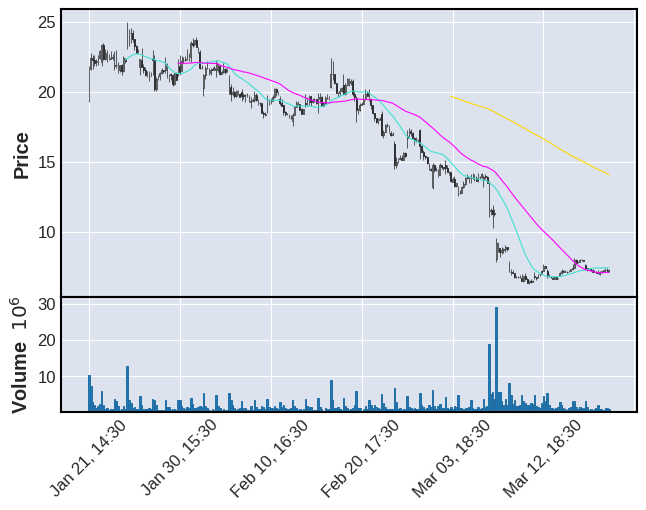

In [120]:
mpf.plot(data, type='candle', mav=(21,50,200), volume=True)

### Create Gramian Angular Field Image

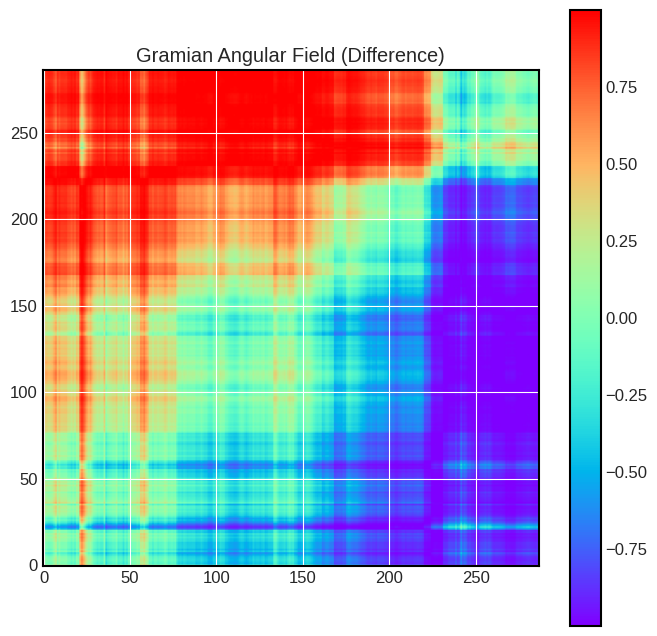

In [121]:
# Select the 'close' prices for the GAF transformation
close_prices = data['close'].values

# Define the GAF transformer
gaf = GramianAngularField(method='difference')

# Transform the close prices into a GAF image
gaf_image = gaf.fit_transform(close_prices.reshape(1, -1))

# Plot the GAF image
plt.figure(figsize=(8, 8))
plt.imshow(gaf_image[0], cmap='rainbow', origin='lower')
plt.title('Gramian Angular Field (Difference)')
plt.colorbar()
gadf_filename = f"images/{ticker}_{interval}_gadf.png"
plt.savefig(gadf_filename)
plt.show()